In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os 

import MDAnalysis as mda
%matplotlib inline

/Users/rangikaweerakoon/anaconda3/envs/Analysis/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [2]:
sns.set_style('white')
plt.rcParams['font.size']='16'
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [3]:
pwd

'/Volumes/My Passport/Inner_membrane_project/AA_inner_membrane_simulations/5LPS_rep1_20PMB1s_backmapped/Notebooks'

In [4]:
sys.path.insert(0,os.path.abspath('../../../Analysis_scripts'))
import hbonds
import data_processing as data

In [5]:
structure="../Trajectories_and_tprs/step7_production.tpr"
trajectory="../Trajectories_and_tprs/step7_production_full.xtc"
folder="../H_bonds/"

PMB1s="resname PMB and not (resid 48587 48589 48584 48578 48580 48592 48588 48591)"

RAMP="resname RAMP"
POPE="resname POPE"
POPG="resname POPG"

In [ ]:
u=mda.Universe(structure,trajectory)

In [7]:
print(u.select_atoms("resname RAMP and name OA3 O53 O73 OB3 OA1 OA5 OA6 OB5 OB4 OB6 and resid 1271"))

<AtomGroup [<Atom 159210: OB6 of type OC301 of resname RAMP, resid 1271 and segid seg_2_RAMP>, <Atom 159214: OB5 of type OC3C61 of resname RAMP, resid 1271 and segid seg_2_RAMP>, <Atom 159218: OA6 of type OC301 of resname RAMP, resid 1271 and segid seg_2_RAMP>, <Atom 159224: OB4 of type OC30P of resname RAMP, resid 1271 and segid seg_2_RAMP>, <Atom 159230: OB3 of type OC301 of resname RAMP, resid 1271 and segid seg_2_RAMP>, <Atom 159247: OA5 of type OC3C61 of resname RAMP, resid 1271 and segid seg_2_RAMP>, <Atom 159250: OA1 of type OC30P of resname RAMP, resid 1271 and segid seg_2_RAMP>, <Atom 159257: OA3 of type OC301 of resname RAMP, resid 1271 and segid seg_2_RAMP>, <Atom 159269: O73 of type OSL of resname RAMP, resid 1271 and segid seg_2_RAMP>, <Atom 159353: O53 of type OSL of resname RAMP, resid 1271 and segid seg_2_RAMP>]>


In [8]:
PMB1_acceptors="resname PMB and (name O1 O10 O11 O12 O13 O2 O3 O4 O5 O6 O7 O8 O9)"
RAMP_acceptors="resname RAMP and (name O O11 O12 O13 O2 O3 O31 O33 O4 O5 O51 O6 O61 O7 O71 O8 O81 OA4 OP42 OP43 OP44 OPA2 OPA3 OPA4 OPB2 OPB3 OPB4 OA3 O53 O73 OB3 OA1 OA5 OA6 OB5 OB4 OB6)"
POPE_acceptors="resname POPE and (name O11 O12 O13 O14 O22 O32 O21 O31)"
POPG_acceptors="resname POPG and (name O11 O12 O13 O14 O22 O32 OC2 OC3 O21 O31)"


PMB1_hydrogens="resname PMB and (name H10 H11 H12 H13 H14 H15 H16 H17 H18 H19 H2 H20 H21 H22 H23 H29 H3 H30 H31 H32 H33 H4 H5 H6 H7 H8 H9)"
RAMP_hydrogens="resname RAMP and (name HN HNA2 HNB2 HO13 HO2 HO3 HO33 HO4 HO5 HO6 HO7 HO8 HOA4)"
POPE_hydrogens="resname POPE and (name HN1 HN2 HN3)"
POPG_hydrogens="resname POPG and (name HO2 HO3)"


In [9]:
hbonds_PMB1_RAMP_end=hbonds.Hbonds_calculation(tpr=structure,traj=trajectory,hydrogens_guess=None,acceptors_guess=None,hydrogens=f"({PMB1_hydrogens}) or ({RAMP_hydrogens})",acceptors=f"({PMB1_acceptors}) or ({RAMP_acceptors})",between=[f"{PMB1s}",f"{RAMP}"],start=40000)
hbonds_PMB1_RAMP_end.calculation()


  0%|          | 0/9997 [00:00<?, ?it/s]

In [10]:
hbonds_PMB1_donors_RAMP_end=hbonds.Hbonds_calculation(tpr=structure,traj=trajectory,hydrogens_guess=None,acceptors_guess=None,hydrogens=f"({PMB1_hydrogens})",acceptors=f"({RAMP_acceptors})",between=[f"{PMB1s}",f"{RAMP}"],start=40000)
hbonds_PMB1_donors_RAMP_end.calculation()


  0%|          | 0/9997 [00:00<?, ?it/s]

In [11]:
hbonds_PMB1_acceptors_RAMP_end=hbonds.Hbonds_calculation(tpr=structure,traj=trajectory,hydrogens_guess=None,acceptors_guess=None,hydrogens=f"({RAMP_hydrogens})",acceptors=f"({PMB1_acceptors})",between=[f"{PMB1s}",f"{RAMP}"],start=40000)
hbonds_PMB1_acceptors_RAMP_end.calculation()


  0%|          | 0/9997 [00:00<?, ?it/s]

In [12]:
hbonds_PMB1_POPE_end=hbonds.Hbonds_calculation(tpr=structure,traj=trajectory,hydrogens_guess=None,acceptors_guess=None,hydrogens=f"({PMB1_hydrogens}) or ({POPE_hydrogens})",acceptors=f"({PMB1_acceptors}) or ({POPE_acceptors})",between=[f"{PMB1s}",f"{POPE}"],start=40000)
hbonds_PMB1_POPE_end.calculation()

  0%|          | 0/9997 [00:00<?, ?it/s]

In [13]:
hbonds_PMB1_donors_POPE_end=hbonds.Hbonds_calculation(tpr=structure,traj=trajectory,hydrogens_guess=None,acceptors_guess=None,hydrogens=f"({PMB1_hydrogens})",acceptors=f"({POPE_acceptors})",between=[f"{PMB1s}",f"{POPE}"],start=40000)
hbonds_PMB1_donors_POPE_end.calculation()


  0%|          | 0/9997 [00:00<?, ?it/s]

In [14]:
hbonds_PMB1_acceptors_POPE_end=hbonds.Hbonds_calculation(tpr=structure,traj=trajectory,hydrogens_guess=None,acceptors_guess=None,hydrogens=f"({POPE_hydrogens})",acceptors=f"({PMB1_acceptors})",between=[f"{PMB1s}",f"{POPE}"],start=40000)
hbonds_PMB1_acceptors_POPE_end.calculation()


  0%|          | 0/9997 [00:18<?, ?it/s]

/home/dhanushkaw/anaconda3/envs/Analysis/lib/python3.9/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:765: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, (resname PMB and (name O1 O10 O11 O12 O13 O2 O3 O4 O5 O6 O7 O8 O9)).
  warnings.warn(


In [15]:
hbonds_PMB1_POPG_end=hbonds.Hbonds_calculation(tpr=structure,traj=trajectory,hydrogens_guess=None,acceptors_guess=None,hydrogens=f"({PMB1_hydrogens}) or ({POPG_hydrogens})",acceptors=f"({PMB1_acceptors}) or ({POPG_acceptors})",between=[f"{PMB1s}",f"{POPG}"],start=40000)
hbonds_PMB1_POPG_end.calculation()

  0%|          | 0/9997 [00:08<?, ?it/s]

In [16]:
hbonds_PMB1_donors_POPG_end=hbonds.Hbonds_calculation(tpr=structure,traj=trajectory,hydrogens_guess=None,acceptors_guess=None,hydrogens=f"({PMB1_hydrogens})",acceptors=f"({POPG_acceptors})",between=[f"{PMB1s}",f"{POPG}"],start=40000)
hbonds_PMB1_donors_POPG_end.calculation()


  0%|          | 0/9997 [00:00<?, ?it/s]

In [17]:
hbonds_PMB1_acceptors_POPG_end=hbonds.Hbonds_calculation(tpr=structure,traj=trajectory,hydrogens_guess=None,acceptors_guess=None,hydrogens=f"({POPG_hydrogens})",acceptors=f"({PMB1_acceptors})",between=[f"{PMB1s}",f"{POPG}"],start=40000)
hbonds_PMB1_acceptors_POPG_end.calculation()


  0%|          | 0/9997 [00:00<?, ?it/s]

/home/dhanushkaw/anaconda3/envs/Analysis/lib/python3.9/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:733: UserWarning: No hydrogen bonds were found given d-a cutoff of 3.5 between Donor, None, and Acceptor, (resname PMB and (name O1 O10 O11 O12 O13 O2 O3 O4 O5 O6 O7 O8 O9)).
  warnings.warn(


In [32]:
print(hbonds_PMB1_acceptors_RAMP_end.angle_cutoff)

150


In [18]:
print(hbonds_PMB1_POPG_end.hbonds_results.guess_hydrogens("resname POPG"))

(resname POPG and name HO2) or (resname POPG and name HO3)


In [19]:
print(hbonds_PMB1_RAMP_end.hbonds_results.results)

{'hbonds': array([[4.00000000e+04, 1.62484000e+05, 1.62485000e+05, 6.17126000e+05,
        3.09209790e+00, 1.60172736e+02],
       [4.00000000e+04, 1.69884000e+05, 1.69885000e+05, 6.18781000e+05,
        2.79227090e+00, 1.56128306e+02],
       [4.00000000e+04, 1.71627000e+05, 1.71628000e+05, 6.15166000e+05,
        2.82990260e+00, 1.66792307e+02],
       ...,
       [4.99960000e+04, 6.18802000e+05, 6.18804000e+05, 1.69529000e+05,
        2.69356196e+00, 1.56792871e+02],
       [4.99960000e+04, 6.18806000e+05, 6.18807000e+05, 1.69741000e+05,
        2.82580963e+00, 1.57778437e+02],
       [4.99960000e+04, 6.18843000e+05, 6.18846000e+05, 1.69531000e+05,
        2.55651285e+00, 1.67029104e+02]])}


In [20]:
data.pickle_save(filename="../H_bonds/PMB1s_RAMP_overall_Hbonds_end",variable=hbonds_PMB1_RAMP_end)
data.pickle_save(filename="../H_bonds/PMB1s_POPE_overall_Hbonds_end",variable=hbonds_PMB1_POPE_end)
data.pickle_save(filename="../H_bonds/PMB1s_POPG_overall_Hbonds_end",variable=hbonds_PMB1_POPG_end)


In [21]:
data.pickle_save(filename="../H_bonds/PMB1s_donors_RAMP_overall_Hbonds_end",variable=hbonds_PMB1_donors_RAMP_end)
data.pickle_save(filename="../H_bonds/PMB1s_donors_POPE_overall_Hbonds_end",variable=hbonds_PMB1_donors_POPE_end)
data.pickle_save(filename="../H_bonds/PMB1s_donors_POPG_overall_Hbonds_end",variable=hbonds_PMB1_donors_POPG_end)

data.pickle_save(filename="../H_bonds/PMB1s_acceptors_RAMP_overall_Hbonds_end",variable=hbonds_PMB1_acceptors_RAMP_end)
data.pickle_save(filename="../H_bonds/PMB1s_acceptors_POPE_overall_Hbonds_end",variable=hbonds_PMB1_acceptors_POPE_end)
data.pickle_save(filename="../H_bonds/PMB1s_acceptors_POPG_overall_Hbonds_end",variable=hbonds_PMB1_acceptors_POPG_end)


In [6]:
hbonds_PMB1_RAMP_end=data.pickle_open(filename="../H_bonds/PMB1s_RAMP_overall_Hbonds_end")
hbonds_PMB1_POPE_end=data.pickle_open(filename="../H_bonds/PMB1s_POPE_overall_Hbonds_end")
hbonds_PMB1_POPG_end=data.pickle_open(filename="../H_bonds/PMB1s_POPG_overall_Hbonds_end")

hbonds_PMB1_donors_RAMP_end=data.pickle_open(filename="../H_bonds/PMB1s_donors_RAMP_overall_Hbonds_end")
hbonds_PMB1_donors_POPE_end=data.pickle_open(filename="../H_bonds/PMB1s_donors_POPE_overall_Hbonds_end")
hbonds_PMB1_donors_POPG_end=data.pickle_open(filename="../H_bonds/PMB1s_donors_POPG_overall_Hbonds_end")

hbonds_PMB1_acceptors_RAMP_end=data.pickle_open(filename="../H_bonds/PMB1s_acceptors_RAMP_overall_Hbonds_end")
hbonds_PMB1_acceptors_POPE_end=data.pickle_open(filename="../H_bonds/PMB1s_acceptors_POPE_overall_Hbonds_end")
hbonds_PMB1_acceptors_POPG_end=data.pickle_open(filename="../H_bonds/PMB1s_acceptors_POPG_overall_Hbonds_end")


Text(0, 0.5, 'No. of hydrogen bonds per PMB1')

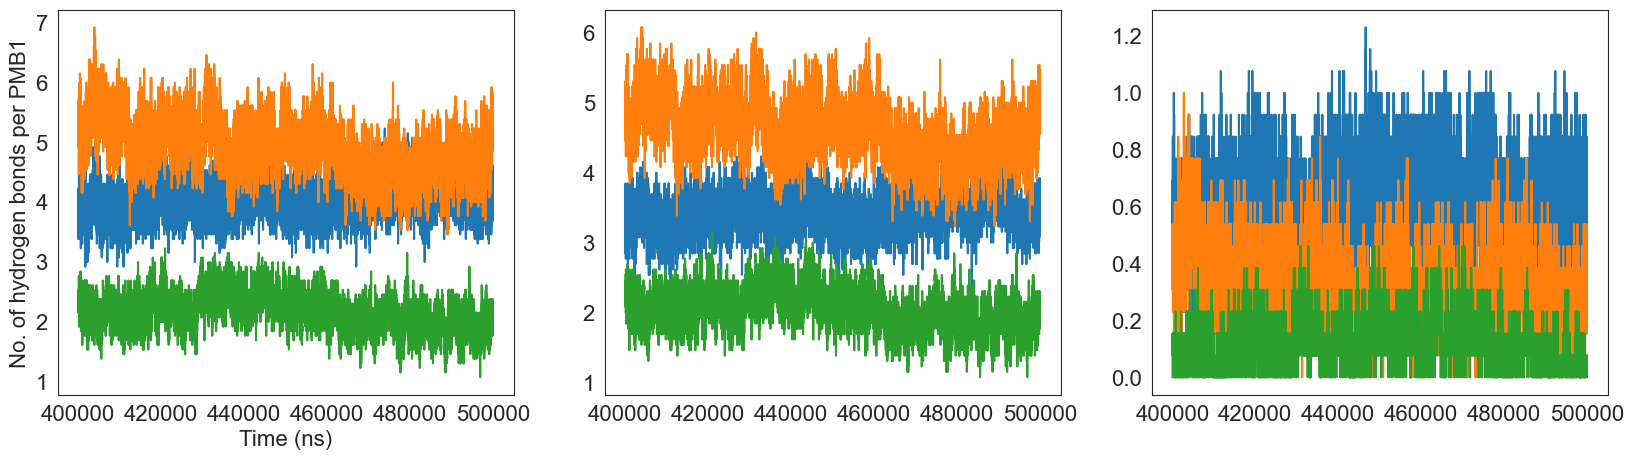

In [7]:
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(20,5))

ax[0].plot(hbonds_PMB1_RAMP_end.hbonds_results.times,hbonds_PMB1_RAMP_end.hbonds_timeseries/13)
ax[0].plot(hbonds_PMB1_POPE_end.hbonds_results.times,hbonds_PMB1_POPE_end.hbonds_timeseries/13)
ax[0].plot(hbonds_PMB1_POPG_end.hbonds_results.times,hbonds_PMB1_POPG_end.hbonds_timeseries/13)


ax[1].plot(hbonds_PMB1_donors_RAMP_end.hbonds_results.times,hbonds_PMB1_donors_RAMP_end.hbonds_timeseries/13)
ax[1].plot(hbonds_PMB1_donors_POPE_end.hbonds_results.times,hbonds_PMB1_donors_POPE_end.hbonds_timeseries/13)
ax[1].plot(hbonds_PMB1_donors_POPG_end.hbonds_results.times,hbonds_PMB1_donors_POPG_end.hbonds_timeseries/13)


ax[2].plot(hbonds_PMB1_acceptors_RAMP_end.hbonds_results.times,hbonds_PMB1_acceptors_RAMP_end.hbonds_timeseries/13)
ax[2].plot(hbonds_PMB1_acceptors_POPE_end.hbonds_results.times,hbonds_PMB1_acceptors_POPE_end.hbonds_timeseries/13)
ax[2].plot(hbonds_PMB1_acceptors_POPG_end.hbonds_results.times,hbonds_PMB1_acceptors_POPG_end.hbonds_timeseries/13)

#ax.set_title("Number of hydrogen bonds over time", weight="bold")
ax[0].set_xlabel("Time (ns)")
ax[0].set_ylabel("No. of hydrogen bonds per PMB1")

#fig.savefig("PMB1_PL_Hbonds_vs_time.svg",format='svg',dpi=600)
#np.savetxt("PMB1_overall_Hbonds_end.dat",[hbonds_PMB1_overall_LPS_donor.times/1000,hbonds_PMB1_overall_LPS_donor.count_by_time(),hbonds_PMB1_overall_LPS_acceptor.count_by_time(),hbonds_PMB1_overall_PE_donor.count_by_time(),hbonds_PMB1_overall_PE_acceptor.count_by_time(),hbonds_PMB1_overall_PG_donor.count_by_time(),hbonds_PMB1_overall_PG_acceptor.count_by_time()])

In [10]:
np.savetxt("../H_bonds/PMB1s_RAMP_overall_Hbonds_end.txt",[hbonds_PMB1_RAMP_end.hbonds_results.times,hbonds_PMB1_RAMP_end.hbonds_timeseries])
np.savetxt("../H_bonds/PMB1s_POPE_overall_Hbonds_end.txt",[hbonds_PMB1_POPE_end.hbonds_results.times,hbonds_PMB1_POPE_end.hbonds_timeseries])
np.savetxt("../H_bonds/PMB1s_POPG_overall_Hbonds_end.txt",[hbonds_PMB1_POPG_end.hbonds_results.times,hbonds_PMB1_POPG_end.hbonds_timeseries])

np.savetxt("../H_bonds/PMB1s_donors_RAMP_overall_Hbonds_end.txt",[hbonds_PMB1_donors_RAMP_end.hbonds_results.times,hbonds_PMB1_donors_RAMP_end.hbonds_timeseries])
np.savetxt("../H_bonds/PMB1s_donors_POPE_overall_Hbonds_end.txt",[hbonds_PMB1_donors_POPE_end.hbonds_results.times,hbonds_PMB1_donors_POPE_end.hbonds_timeseries])
np.savetxt("../H_bonds/PMB1s_donors_POPG_overall_Hbonds_end.txt",[hbonds_PMB1_donors_POPG_end.hbonds_results.times,hbonds_PMB1_donors_POPG_end.hbonds_timeseries])

np.savetxt("../H_bonds/PMB1s_acceptors_RAMP_overall_Hbonds_end.txt",[hbonds_PMB1_acceptors_RAMP_end.hbonds_results.times,hbonds_PMB1_acceptors_RAMP_end.hbonds_timeseries])
np.savetxt("../H_bonds/PMB1s_acceptors_POPE_overall_Hbonds_end.txt",[hbonds_PMB1_acceptors_POPE_end.hbonds_results.times,hbonds_PMB1_acceptors_POPE_end.hbonds_timeseries])
np.savetxt("../H_bonds/PMB1s_acceptors_POPG_overall_Hbonds_end.txt",[hbonds_PMB1_acceptors_POPG_end.hbonds_results.times,hbonds_PMB1_acceptors_POPG_end.hbonds_timeseries])



In [ ]:
# Looks a bit weird - broadly working - what is HT though? It should show a donor right?
# If problematic, use full trajectory instead

In [30]:
print(hbonds_PMB1_RAMP_end.hbonds_results.count_by_type())
#print(hbonds_PMB1_POPE_end.hbonds_results.count_by_type())

[['PMB:NG2S1' 'RAMP:OBL' '1518']
 ['PMB:NG2S1' 'RAMP:OC2D1' '18026']
 ['PMB:NG2S1' 'RAMP:OC2D2' '8']
 ['PMB:NG2S1' 'RAMP:OC2DP' '1329']
 ['PMB:NG2S1' 'RAMP:OC301' '211']
 ['PMB:NG2S1' 'RAMP:OC311' '18240']
 ['PMB:NG2S1' 'RAMP:OC3C61' '2']
 ['PMB:NG2S1' 'RAMP:OH1' '258']
 ['PMB:NG3P3' 'RAMP:OBL' '5082']
 ['PMB:NG3P3' 'RAMP:OC2D1' '1148']
 ['PMB:NG3P3' 'RAMP:OC2D2' '83002']
 ['PMB:NG3P3' 'RAMP:OC2DP' '237226']
 ['PMB:NG3P3' 'RAMP:OC301' '5815']
 ['PMB:NG3P3' 'RAMP:OC30P' '3726']
 ['PMB:NG3P3' 'RAMP:OC311' '49895']
 ['PMB:NG3P3' 'RAMP:OC3C61' '2449']
 ['PMB:NG3P3' 'RAMP:OH1' '250']
 ['PMB:OG311' 'RAMP:OBL' '635']
 ['PMB:OG311' 'RAMP:OC2D1' '23']
 ['PMB:OG311' 'RAMP:OC2D2' '40']
 ['PMB:OG311' 'RAMP:OC2DP' '7352']
 ['PMB:OG311' 'RAMP:OC301' '9']
 ['PMB:OG311' 'RAMP:OC311' '9606']
 ['PMB:OG311' 'RAMP:OC3C61' '326']
 ['PMB:OG311' 'RAMP:OH1' '1259']
 ['RAMP:NC2D1' 'PMB:OG2D1' '7727']
 ['RAMP:NC2D1' 'PMB:OG311' '71']
 ['RAMP:OC311' 'PMB:OG2D1' '54422']
 ['RAMP:OC311' 'PMB:OG311' '4246']
 ['RAMP

In [26]:
print(hbonds_PMB1_POPE_end.hbonds_results.count_by_type())

[['PMB:NG2S1' 'POPE:O2L' '140579']
 ['PMB:NG2S1' 'POPE:OBL' '38024']
 ['PMB:NG2S1' 'POPE:OSL' '1458']
 ['PMB:NG2S1' 'POPE:OSLP' '9426']
 ['PMB:NG3P3' 'POPE:O2L' '324581']
 ['PMB:NG3P3' 'POPE:OBL' '37793']
 ['PMB:NG3P3' 'POPE:OSL' '162']
 ['PMB:NG3P3' 'POPE:OSLP' '10477']
 ['PMB:OG311' 'POPE:O2L' '21226']
 ['PMB:OG311' 'POPE:OBL' '12524']
 ['PMB:OG311' 'POPE:OSL' '475']
 ['PMB:OG311' 'POPE:OSLP' '3779']
 ['POPE:NH3L' 'PMB:OG2D1' '39625']
 ['POPE:NH3L' 'PMB:OG311' '1540']]


In [27]:
print(hbonds_PMB1_POPG_end.hbonds_results.count_by_type())

[['PMB:NG2S1' 'POPG:O2L' '68525']
 ['PMB:NG2S1' 'POPG:OBL' '15474']
 ['PMB:NG2S1' 'POPG:OHL' '7793']
 ['PMB:NG2S1' 'POPG:OSL' '1346']
 ['PMB:NG2S1' 'POPG:OSLP' '2396']
 ['PMB:NG3P3' 'POPG:O2L' '121098']
 ['PMB:NG3P3' 'POPG:OBL' '16350']
 ['PMB:NG3P3' 'POPG:OHL' '22102']
 ['PMB:NG3P3' 'POPG:OSL' '37']
 ['PMB:NG3P3' 'POPG:OSLP' '8592']
 ['PMB:OG311' 'POPG:O2L' '1765']
 ['PMB:OG311' 'POPG:OBL' '180']
 ['PMB:OG311' 'POPG:OHL' '680']
 ['PMB:OG311' 'POPG:OSL' '341']
 ['PMB:OG311' 'POPG:OSLP' '543']
 ['POPG:OHL' 'PMB:OG2D1' '15413']
 ['POPG:OHL' 'PMB:OG311' '918']]
